<h1><b> Mideterm Project</h1></b>

Gaming is a very big industry now. Every year there are millions of Dollars invested in Esports and many new companies want to invest in the Esports scene now. One of bigegest ever deals was when Mixer opened up and brought Ninja and Shroud to their platform from twitch. But Twitch has been a home to streamers since day 1 and now that Mixer has been shut down, streamers are returning to the platform again.Millions, if not billions, watch twitch streams everyday and i myself like to watch twitch streams. So, I put together Top 1000 Streamers from past one year who were streaming on twitch.

Data Link: https://www.kaggle.com/aayushmishra1512/twitchdata

My dataset consists of 11 columns namely: 
- Channel Name: It is the list of the usernames a player uses in the online world to stream their gameplays.
- Watch time(Minutes): This column indicates the total time viewer has spent watching the channel.
- Stream time(minutes): This column displays the total minutes spents streaming by the streamer.
- Peak Viewers: This columns tells us the number of maximum number of viewers viewing a particular stream at a point.
- Average Viewers: It displays a average number of viewers watching the streamers channel.
- Followers: This columns indicates the number of users on twitch streaming platform following the channel.
- Followers Gained: This columns entails the number of followers gained by a particular account.
- Views Gained: This column shows the number of views gained on a certain Channel.
- Partnered: This column shows whether a stremer has ever partner with other streamer to promote their channel.
- Mature: This columns entails whether a channel contains any explicit contain to be viewed only by user above 18 years of age.
- Language: This columns shows us the language in which the stream is being performed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as no
import numpy as np
%matplotlib inline

In [2]:
ts = pd.read_csv('Twitch_Streamers_Database.csv')

<h2><b> Overview Of the Dataset: </h3></b>

In [3]:
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
ts.shape

(1000, 11)

In [5]:
ts.size

11000

In [6]:
ts.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [7]:
ts.describe

<bound method NDFrame.describe of               Channel  Watch time(Minutes)  Stream time(minutes)  \
0               xQcOW           6196161750                215250   
1            summit1g           6091677300                211845   
2              Gaules           5644590915                515280   
3            ESL_CSGO           3970318140                517740   
4                Tfue           3671000070                123660   
..                ...                  ...                   ...   
995         LITkillah            122524635                 13560   
996  빅헤드 (bighead033)            122523705                153000   
997    마스카 (newmasca)            122452320                217410   
998     AndyMilonakis            122311065                104745   
999              Remx            122192850                 99180   

     Peak viewers  Average viewers  Followers  Followers gained  Views gained  \
0          222720            27716    3246298           1734810     

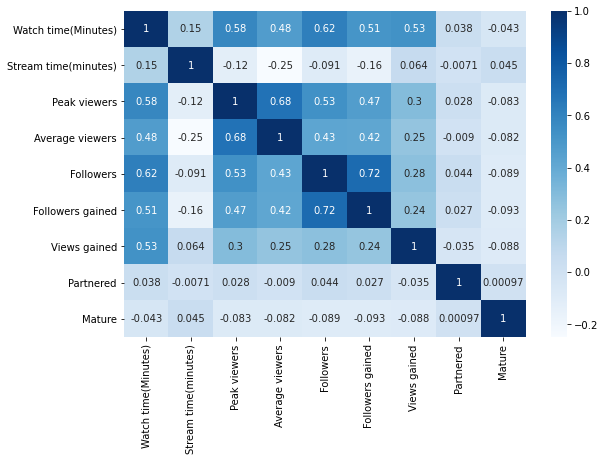

In [8]:
# Corelation of the Data
# df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(ts.corr(), yticklabels='auto',annot=True, cmap='Blues')
plt.show()

based on the above table, We can clearly say that the data is mildly corelated.

<h2><b> Cleaning The Dataset: </h2></b>

No Null Values in the Data Set


<AxesSubplot:>

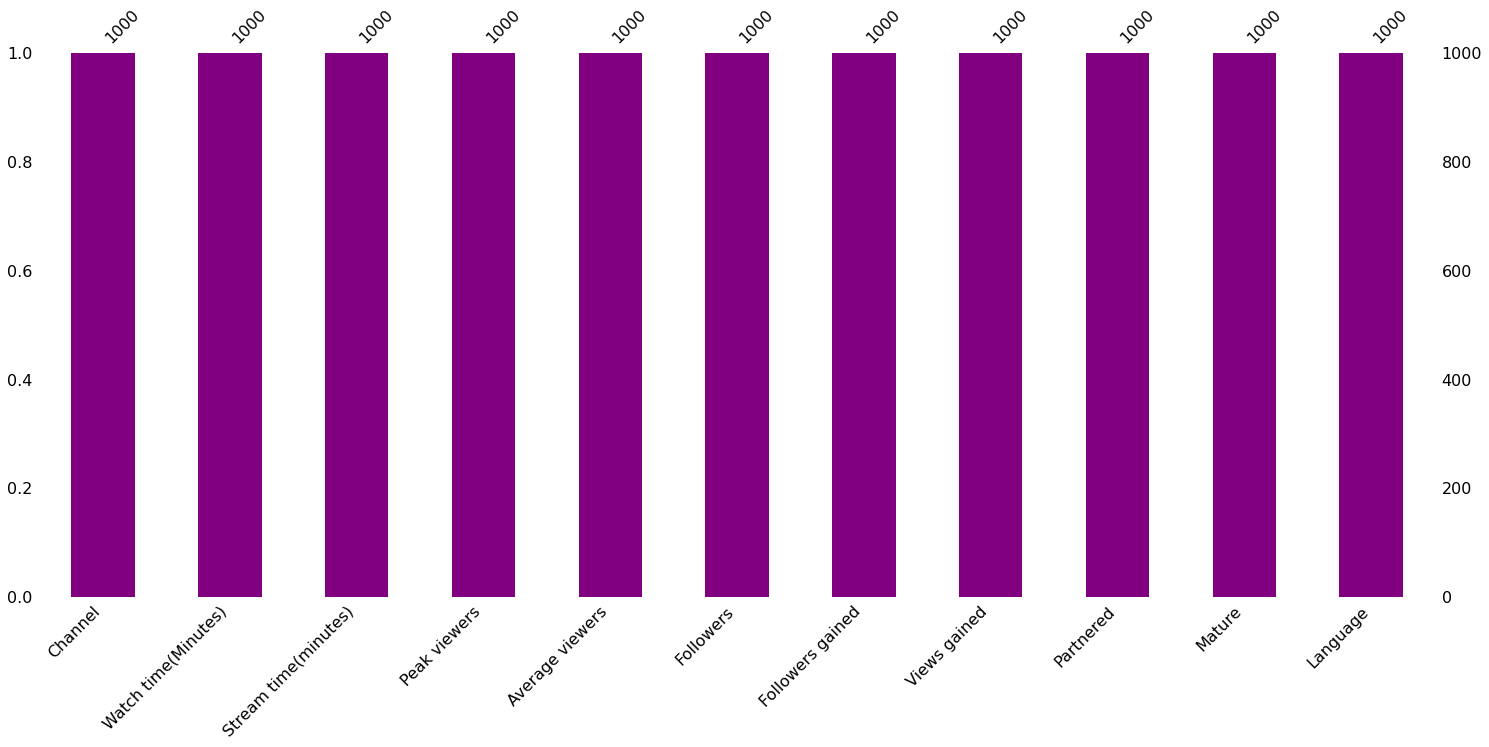

In [9]:
if ts.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(ts[ts.isnull().any(axis=1)].head(3))
    missingno.matrix(ts)
    plt.show()
else:
    print('No Null Values in the Data Set')

no.bar(ts, color='purple')

In [52]:
# generate count statistics of duplicate entries
if len(ts[ts.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(ts[ts.duplicated()]))
    print(ts[ts.duplicated(keep=False)].sort_values(by=list(ts.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


<h2><b> General Visualisation of the Dataset:</h2></b> 

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



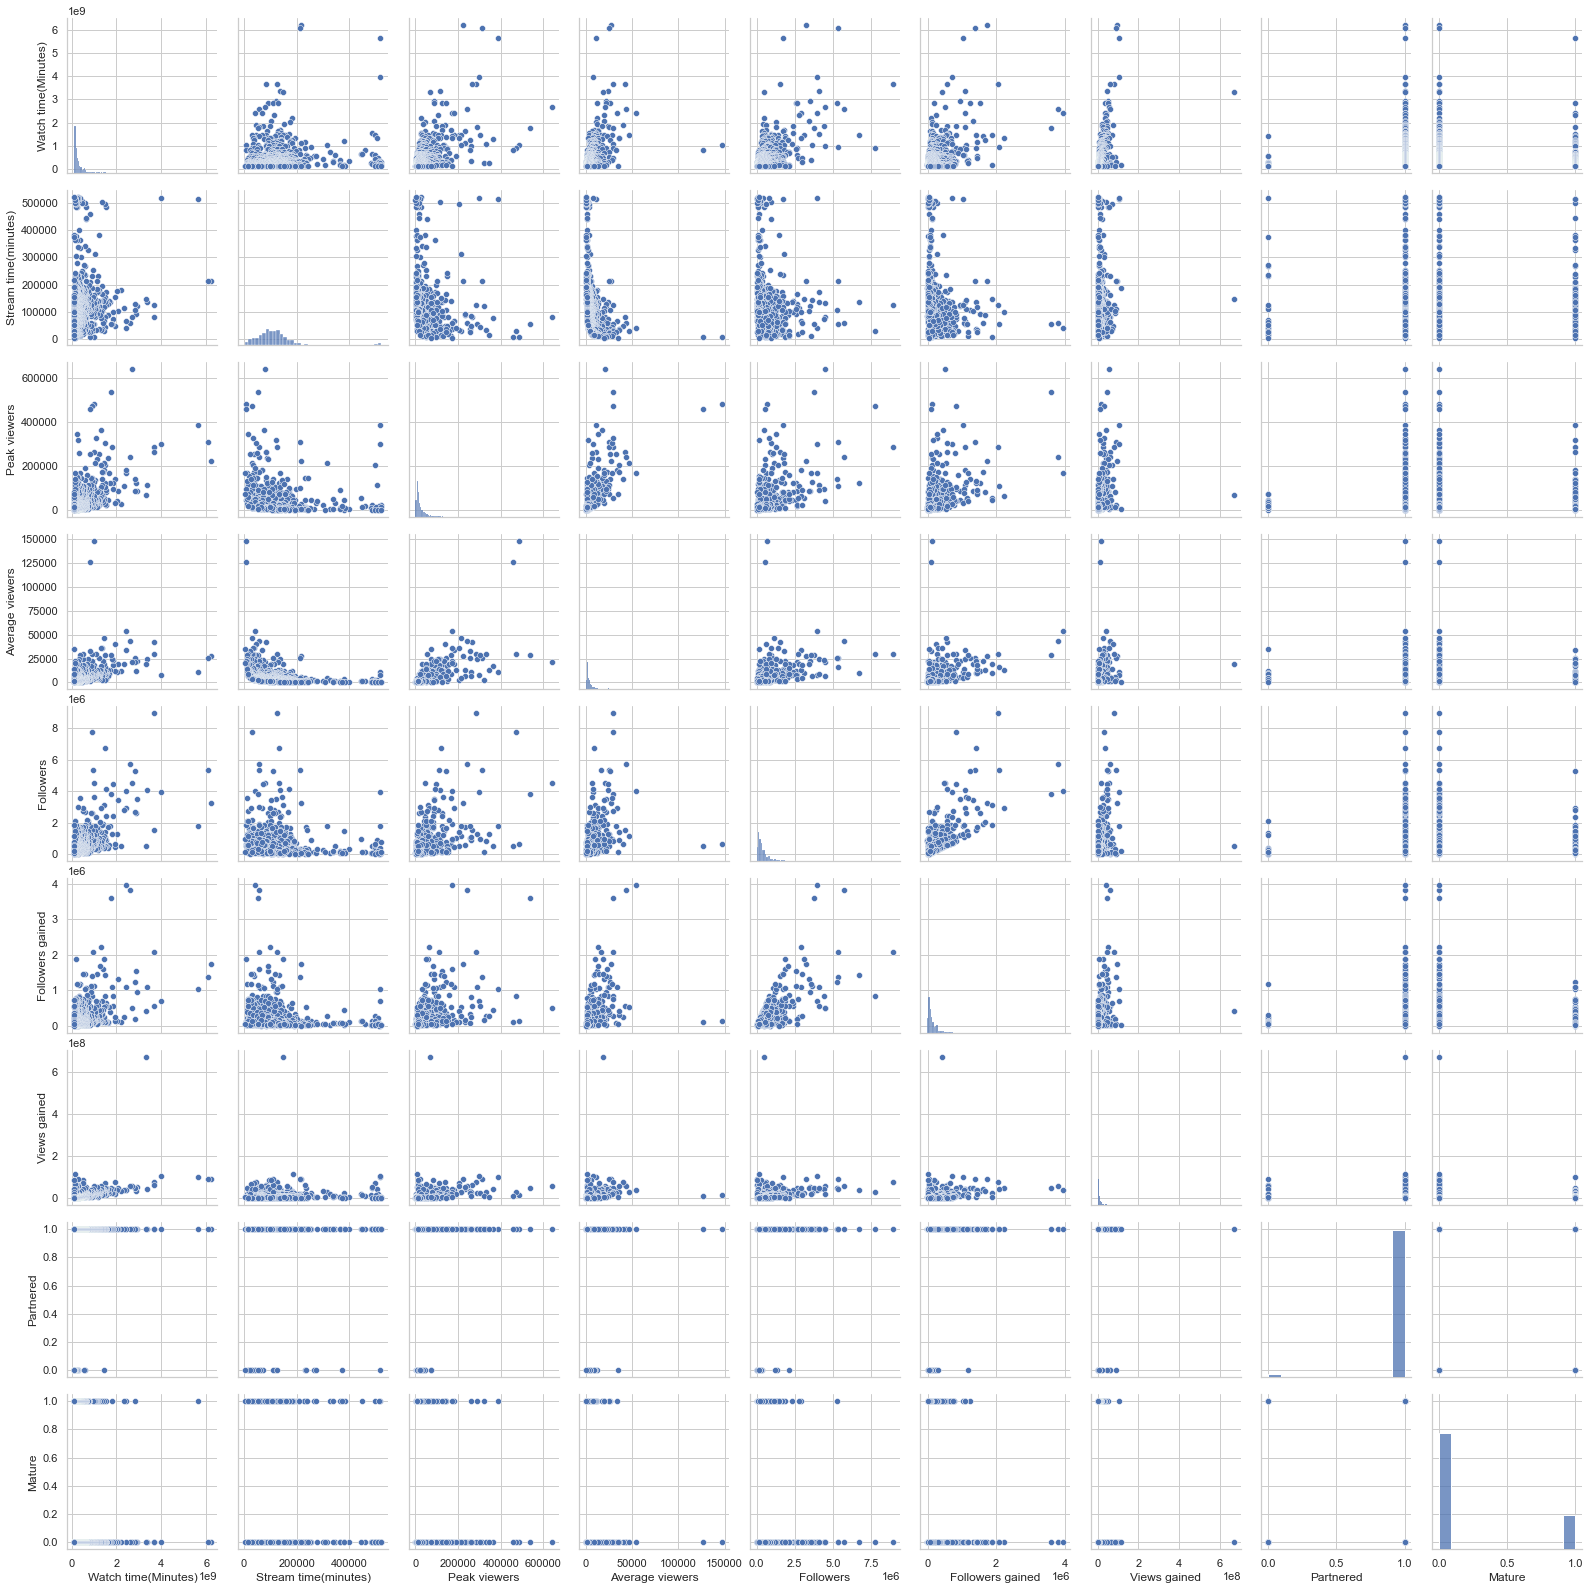

In [53]:
sns.pairplot(ts)

<h2><b> Different Languages Used by the Streamers:</h2></b>

In [54]:
ts.Language.unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

In [57]:
# #Languages in which the streams are conducted by this streamers.
fig = px.pie(ts, names='Language', title='Language Distribution on Twitch:')
fig.show()


Based on the pie chart, the most used language in the Twitch world is English followed by Korean and Russian. English leads the twitch domain evidently.

<h2><b> Language of the Followers: </h2></b>

Text(0.5, 1.0, 'Language of the Followers')

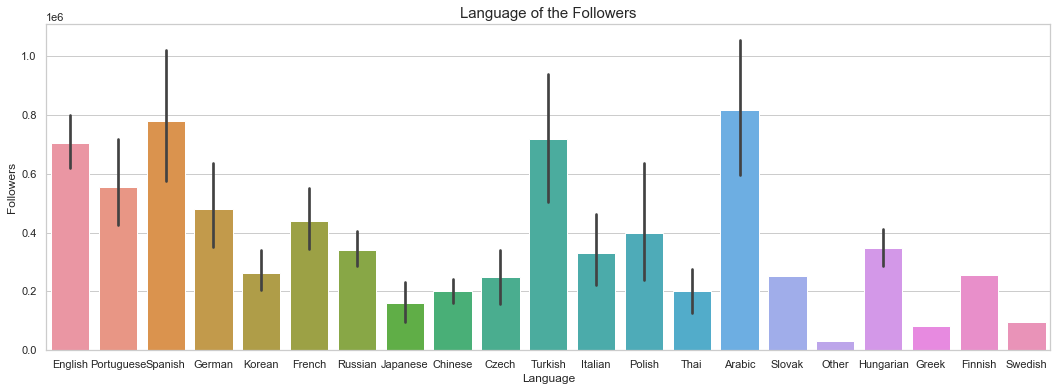

In [58]:
plt.figure(figsize=(18,6))
sns.barplot(x=ts.Language, y=ts.Followers)
plt.title('Language of the Followers', fontsize=15)

As we can see from the bars plotted, maximum followers in the twitch world belong to Arabic and spanish community followed by Turkish and English repectively.

<h2><b> Language of the Viewers:

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\KARAN\anaconda3\lib\site-packag

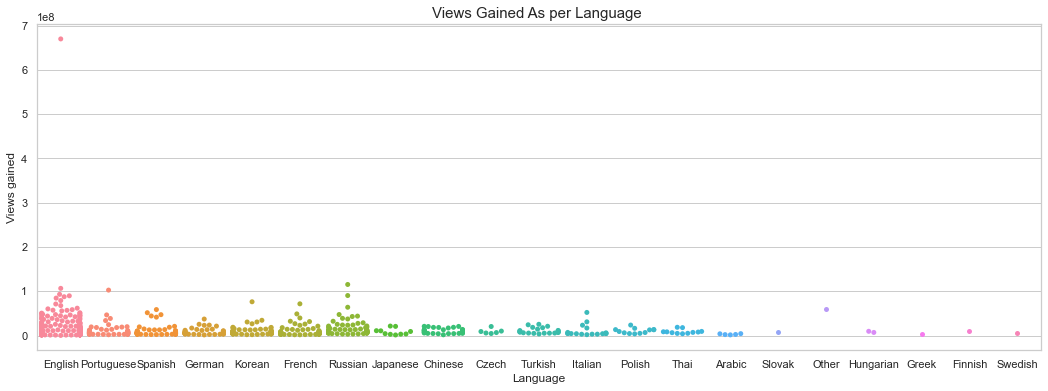

In [59]:
plt.figure(figsize=(18,6))
sns.swarmplot(x="Language" , y = "Views gained" ,data=ts)
plt.title("Views Gained As per Language ", fontsize=15)
plt.show()

Most of the views gained are gained by the English Users.

<h2><b> Visualisation of Streamers whocollaborate with Other Streamers for boost their Channels: </h2></b>

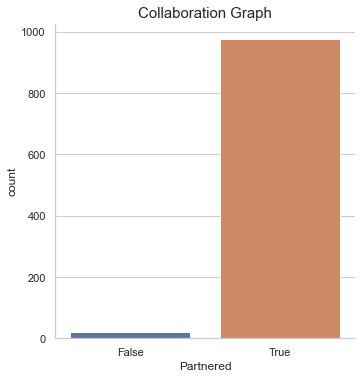

In [65]:
#Streamers who have partnered with other streamer to promote their streams VS streamers who have not partnered with anybody.
fig2 = sns.catplot(x='Partnered', kind="count", data=ts)
# fig2.set_xticklabels(rotation=90)
plt.title('Collaboration Graph', fontsize = 15)
plt.show()

# <h2><b> Streamers who upload Mature Content and Child Friendly Content:</h3></b>



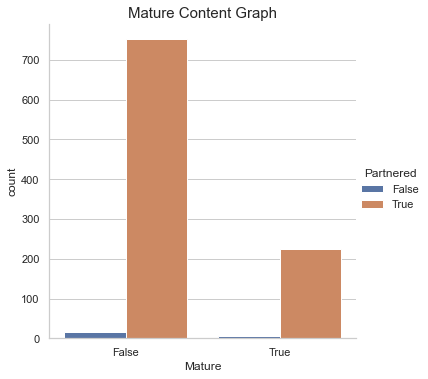

In [66]:
#Streamers who stream Mature content or age explicit content VS streamers who stream Child frinedly content.
fig1 = sns.catplot(x='Mature', kind="count", data=ts, hue='Partnered')
# fig1.set_xticklabels(rotation=90)
plt.title('Mature Content Graph', fontsize = 15)
plt.show()

<h2><b>Average Watchtime of the Channels:</h2></b>

Text(0.5, 1.0, 'Average watchtime of a stream')

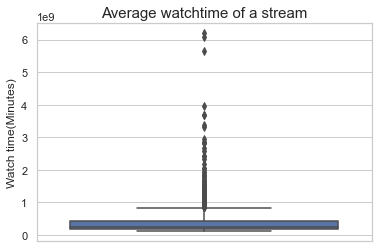

In [67]:
sns.set_theme(style="whitegrid")
sns.boxplot(y=ts["Watch time(Minutes)"])
plt.title('Average watchtime of a stream', fontsize = 15)

Based on the above results, most of the streams have the average viewers between 0-1*1e9 

<h2><b> Visualisation of Stream Time VS Average Viewers of a Streamer</h2></b>

Text(0.5, 1.0, 'Stream Time vs Average Viewers')

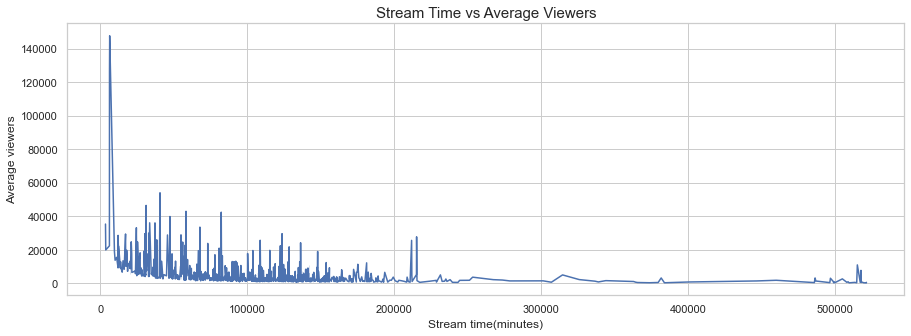

In [68]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Stream time(minutes)" , y="Average viewers"  , data=ts)
plt.title('Stream Time vs Average Viewers', fontsize = 15)

As we can see, on average the number of viewers viewing a stream does not particularly depend upon the stream time. Infact, streamers who stream less hold higher viewers than others.

<h2><b> Strem Time VS Followers gained Visualisation:

C:\Users\KARAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



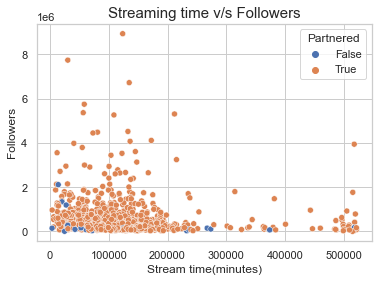

In [69]:
sns.scatterplot(ts['Stream time(minutes)'], ts['Followers'],hue=ts['Partnered'])
plt.title('Streaming time v/s Followers', fontsize = 15)
plt.show()

This shows that all the top streamers have partnered with eachother atleast once to boost the engagement of their channel. Moreover, Somewhat rise in the followers is observed with streamers who stream less than those who stream more minutes.

<h2><b> Channels With Top Views Gained: </h2></b>

Text(0.5, 1.0, 'Top views gained Channels are')

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54413 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50900 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 47049 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 46041 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49689 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 54413 missing from current font.

C:\Users\KARAN\anaco

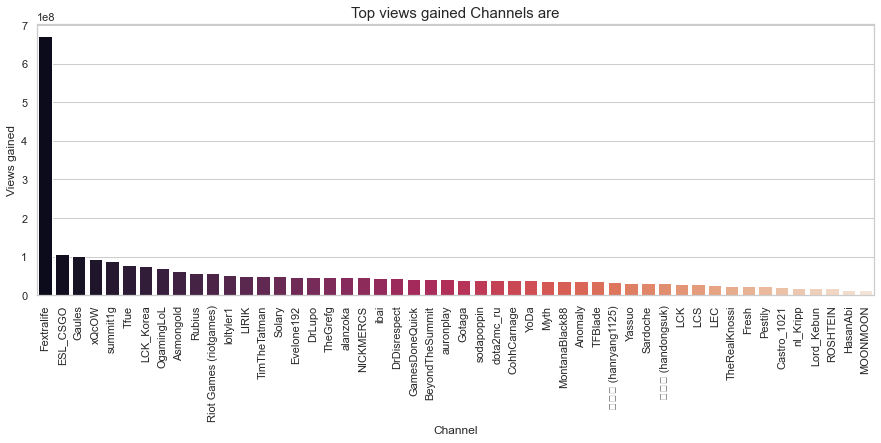

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x='Channel',y='Views gained',data=ts[:50].sort_values(by='Views gained',ascending=False),palette='rocket')
plt.xticks(rotation=90)
plt.title("Top views gained Channels are", fontsize=15)

As observed in the above graph, Fextralife is not the most followed streamer or the streamer with maximum watchtime, but he has the maximum views gained. This can the result of a viral videos surfing on the internet, which can result in undirected boost in the views in a short time frame.

<h2><b> Analysing for top 100 Streamers</h2></b>

In [71]:
ts100=df[:100]

In [72]:
ts100.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [73]:
ts100.shape

(100, 11)

<h2><b>Visualisation of Corelation Between Top 100 Streamers:

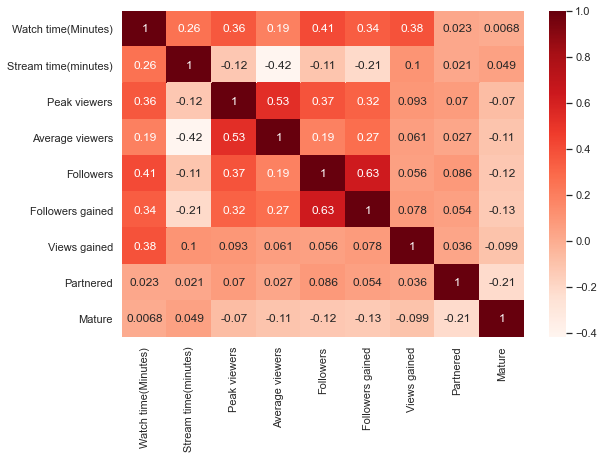

In [74]:
plt.figure(figsize=(9,6))
sns.heatmap(ts100.corr(), yticklabels='auto',annot=True, cmap='Reds')
plt.show()

<h2><b> General Visualisation for top 100 streamers </h2></b>

Text(0.5, 1.0, 'General Plot of top 100 Twitch Streamers')

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54413 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50900 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 47049 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 46041 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49689 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49436 missing from current font.

C:\Users\KARAN\anaco

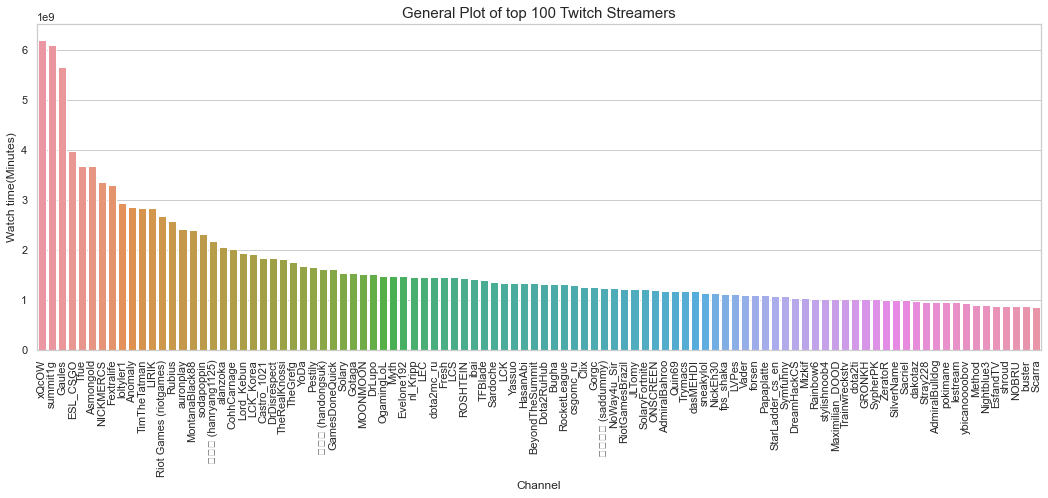

In [75]:
#General Visualisation of the top 100 players
plt.figure(figsize=(18,6))
sns.barplot(x="Channel", y="Watch time(Minutes)", data=ts100)
plt.xticks(rotation=90)
plt.title('General Plot of top 100 Twitch Streamers', fontsize = 15)

<h2><b> Visualisation on Watch Time VS Peak Viewers(Considering the Languge)</h2></b>

Text(0.5, 1.0, 'Dependancy of peak viewers and Watch time')

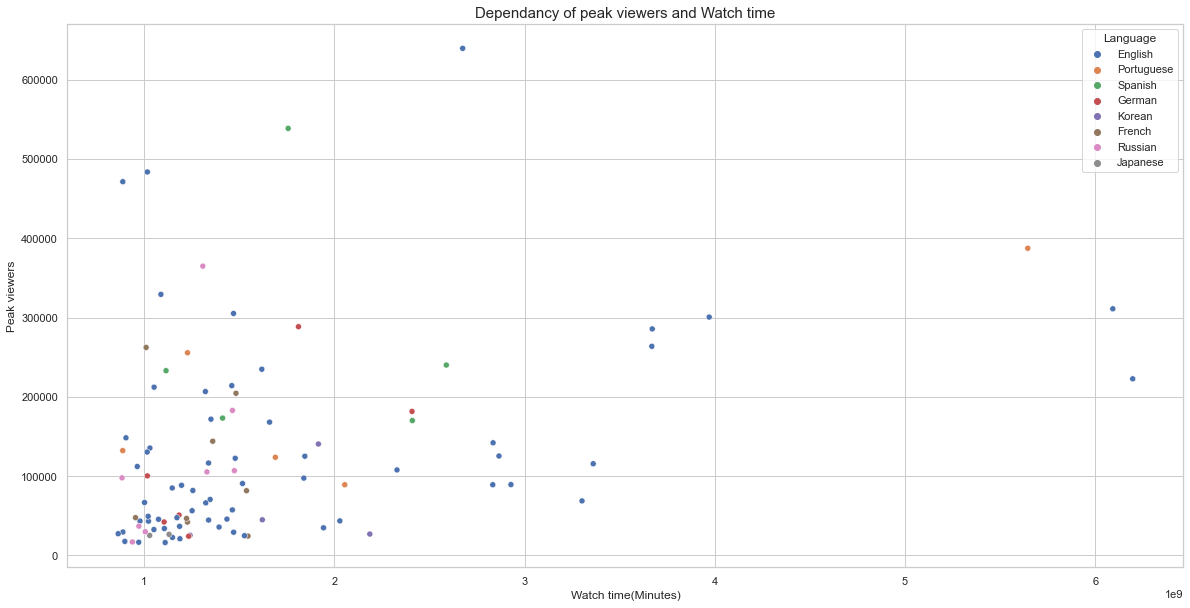

In [76]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=ts100, x="Watch time(Minutes)", y="Peak viewers",hue="Language")
plt.title('Dependancy of peak viewers and Watch time', fontsize = 15)

Based on the visualisations, most of the top 100 streamers use english as their primary language on the streams. Moreover, number of the peak viewers mostly depend on the quality of the stream and not the watch time.

<h2><b> Visualisation of Stream Time VS Watch time</h2></b>

Text(0.5, 1.0, 'Stream Time And Watch Time Corelation')

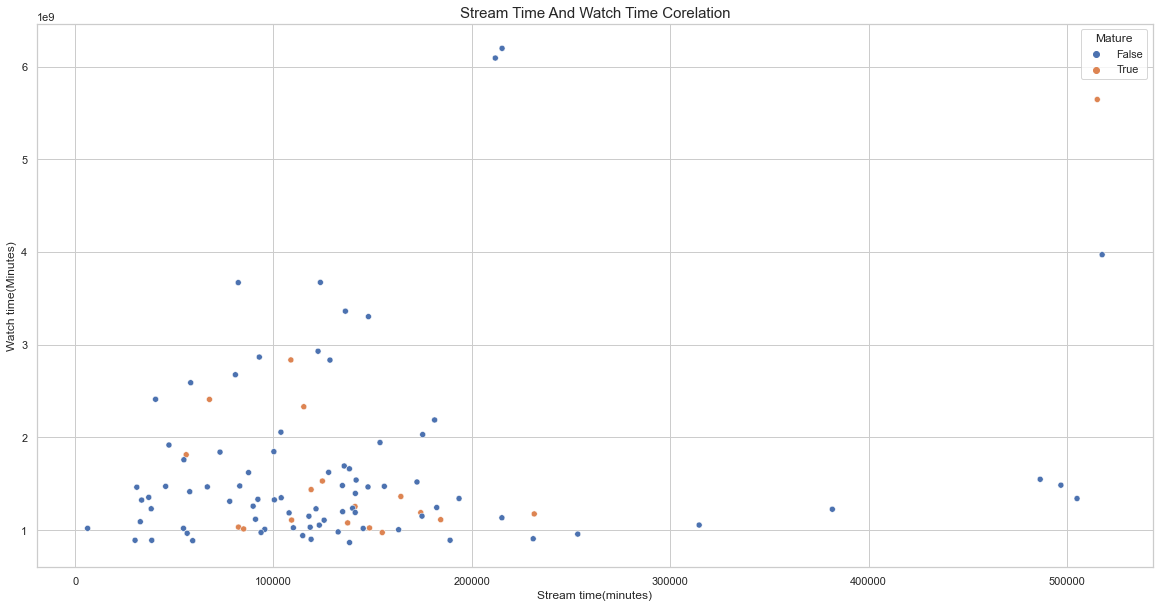

In [77]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=ts100, x="Stream time(minutes)", y="Watch time(Minutes)",hue="Mature")
plt.title('Stream Time And Watch Time Corelation', fontsize = 15)

Most of the streamers upload children friendly content on their streams, furthermore, the watchtime of the stream is not proportional to stream time. Few streamers who are streaming more than 30000 minutes are having barely more than 1000000000 minutes (1666666hrs approx) of watch time.

<h2><b> Visualisation of Peak Viewers of the Channels</h2></b>

Text(0.5, 1.0, 'Peak Viewers of a Channel')

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54413 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50900 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 47049 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 46041 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49689 missing from current font.

C:\Users\KARAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 49436 missing from current font.

C:\Users\KARAN\anaco

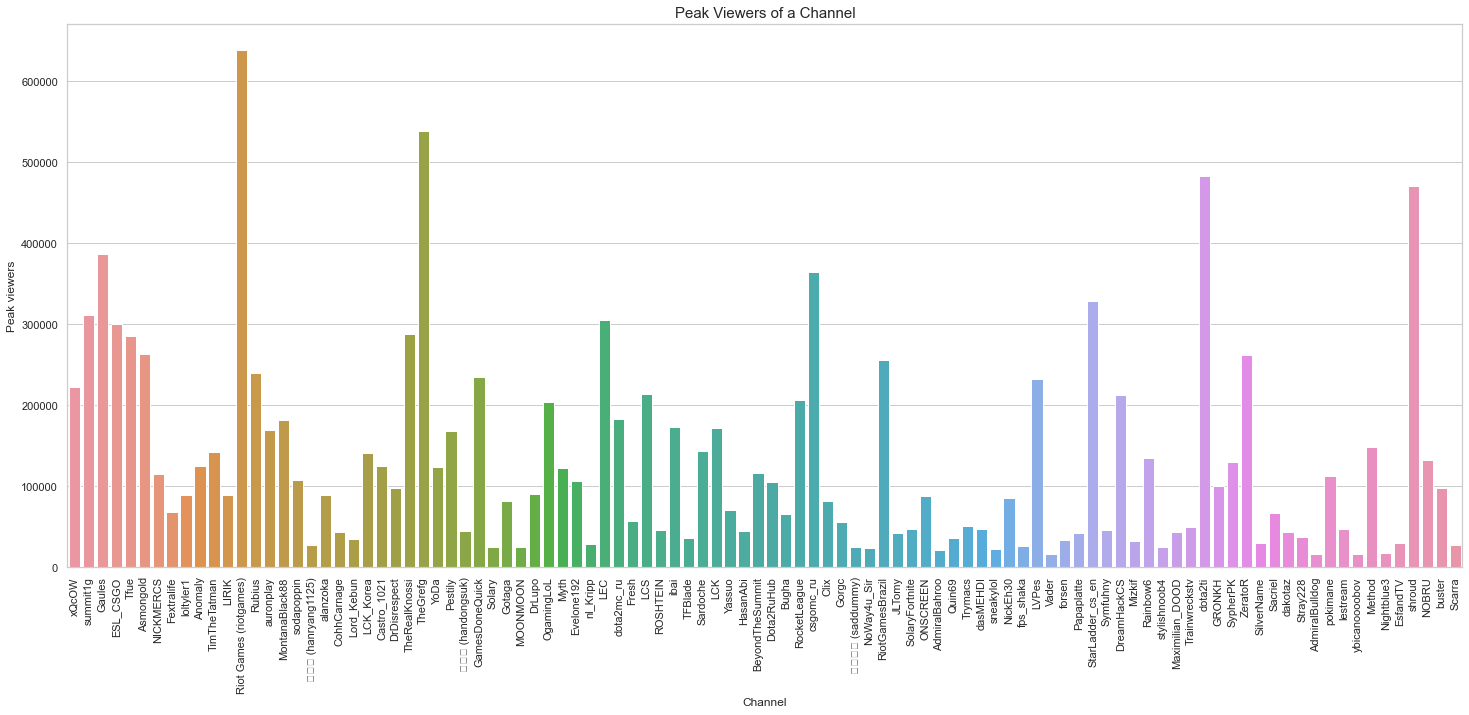

In [78]:
plt.figure(figsize=(25,10))
sns.barplot(x="Channel", y="Peak viewers", data=ts100)
plt.xticks(rotation=90)
plt.title('Peak Viewers of a Channel', fontsize = 15)

Based on the above result, the peak number of viewers will not necessarily depend on the watch time or number of followers of a channel.

<h2><b> Observations:

1. The data is mildly corelated. one attribute doesn't rely on other.

2. 21 languages are used by the top 1000 streamers in the twitch world. Out of which the most widely used language is English(48.5%) followed by Korean(7.7%) and russian(7.4%).

3. Most of the followers are from Arab followed Turky and spain.

4. Viewers of the twitch world mostly watch streams that are uploaded in English.

5. Among the top 1000 streamers, more than 900 streamers have collaborater with each other to boost the engagement of their stream.

6. Very few streamers amongst the top 1000 stream content which is meant of mature audience.

7. Average watchtime of a stream rangers between 0-1*1e9.

8. Average viewers of a stream do not depend upon the stream time as it mainly depends on the content of the stream.

9. Number of follower also do not depends on the stream time as the primarily depend onthe games and the trending content. There are a few exception though in which the followers increase according to the stream time.

10. Fextralife is a channel with maximum views gained because of a viral video that surfaced on the twitch a couple of months back.

11. Corelation among the data of top 100 streams is slight more than that of the all 1000 streamers.

12. Peak viewers is not related to the watch time as it can increase based upon the time of stream.

13. Channels gain peak viewers irrespective of the watch time and stream time. For example, Shroud has higher peak viewers than other even though his channel is on 95 number.